# Example 2: BUILD A MULTIPLE LAYER PERCEPTRON FOR CANCER CLASSIFICATION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# example making new class predictions for a classification problem
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler


In [3]:
# Import Cancer data drom the Sklearn library
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))


In [4]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
X = df_cancer.iloc[:,[0,1]]
X

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [6]:
y = df_cancer['target']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

<AxesSubplot:xlabel='mean radius', ylabel='mean texture'>

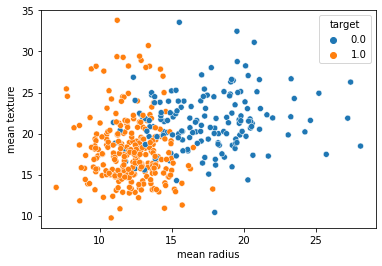

In [7]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sns.scatterplot(x = X_train['mean radius'], y = X_train['mean texture'], hue = y_train)

In [8]:
scalar = MinMaxScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)


scalar = MinMaxScaler()
scalar.fit(X_test)
X_test_scaled = scalar.transform(X_test)


E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

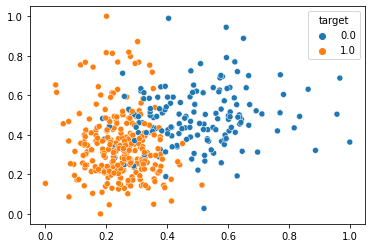

In [9]:

sns.scatterplot(X_train_scaled[:,0], X_train_scaled[:,1], hue=y_train)

In [10]:
# define and fit the final model
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
#model.add(Dense(4, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=500, verbose=2)



Epoch 1/500
14/14 - 1s - loss: 0.7622
Epoch 2/500
14/14 - 0s - loss: 0.7601
Epoch 3/500
14/14 - 0s - loss: 0.7582
Epoch 4/500
14/14 - 0s - loss: 0.7562
Epoch 5/500
14/14 - 0s - loss: 0.7543
Epoch 6/500
14/14 - 0s - loss: 0.7524
Epoch 7/500
14/14 - 0s - loss: 0.7507
Epoch 8/500
14/14 - 0s - loss: 0.7489
Epoch 9/500
14/14 - 0s - loss: 0.7474
Epoch 10/500
14/14 - 0s - loss: 0.7457
Epoch 11/500
14/14 - 0s - loss: 0.7442
Epoch 12/500
14/14 - 0s - loss: 0.7428
Epoch 13/500
14/14 - 0s - loss: 0.7413
Epoch 14/500
14/14 - 0s - loss: 0.7400
Epoch 15/500
14/14 - 0s - loss: 0.7386
Epoch 16/500
14/14 - 0s - loss: 0.7375
Epoch 17/500
14/14 - 0s - loss: 0.7361
Epoch 18/500
14/14 - 0s - loss: 0.7348
Epoch 19/500
14/14 - 0s - loss: 0.7338
Epoch 20/500
14/14 - 0s - loss: 0.7325
Epoch 21/500
14/14 - 0s - loss: 0.7315
Epoch 22/500
14/14 - 0s - loss: 0.7304
Epoch 23/500
14/14 - 0s - loss: 0.7293
Epoch 24/500
14/14 - 0s - loss: 0.7283
Epoch 25/500
14/14 - 0s - loss: 0.7273
Epoch 26/500
14/14 - 0s - loss: 0.

Epoch 209/500
14/14 - 0s - loss: 0.5897
Epoch 210/500
14/14 - 0s - loss: 0.5891
Epoch 211/500
14/14 - 0s - loss: 0.5885
Epoch 212/500
14/14 - 0s - loss: 0.5878
Epoch 213/500
14/14 - 0s - loss: 0.5872
Epoch 214/500
14/14 - 0s - loss: 0.5866
Epoch 215/500
14/14 - 0s - loss: 0.5859
Epoch 216/500
14/14 - 0s - loss: 0.5853
Epoch 217/500
14/14 - 0s - loss: 0.5847
Epoch 218/500
14/14 - 0s - loss: 0.5841
Epoch 219/500
14/14 - 0s - loss: 0.5835
Epoch 220/500
14/14 - 0s - loss: 0.5829
Epoch 221/500
14/14 - 0s - loss: 0.5823
Epoch 222/500
14/14 - 0s - loss: 0.5817
Epoch 223/500
14/14 - 0s - loss: 0.5811
Epoch 224/500
14/14 - 0s - loss: 0.5804
Epoch 225/500
14/14 - 0s - loss: 0.5798
Epoch 226/500
14/14 - 0s - loss: 0.5792
Epoch 227/500
14/14 - 0s - loss: 0.5786
Epoch 228/500
14/14 - 0s - loss: 0.5781
Epoch 229/500
14/14 - 0s - loss: 0.5774
Epoch 230/500
14/14 - 0s - loss: 0.5768
Epoch 231/500
14/14 - 0s - loss: 0.5762
Epoch 232/500
14/14 - 0s - loss: 0.5756
Epoch 233/500
14/14 - 0s - loss: 0.5751


Epoch 414/500
14/14 - 0s - loss: 0.4854
Epoch 415/500
14/14 - 0s - loss: 0.4851
Epoch 416/500
14/14 - 0s - loss: 0.4846
Epoch 417/500
14/14 - 0s - loss: 0.4842
Epoch 418/500
14/14 - 0s - loss: 0.4838
Epoch 419/500
14/14 - 0s - loss: 0.4834
Epoch 420/500
14/14 - 0s - loss: 0.4831
Epoch 421/500
14/14 - 0s - loss: 0.4827
Epoch 422/500
14/14 - 0s - loss: 0.4823
Epoch 423/500
14/14 - 0s - loss: 0.4819
Epoch 424/500
14/14 - 0s - loss: 0.4816
Epoch 425/500
14/14 - 0s - loss: 0.4811
Epoch 426/500
14/14 - 0s - loss: 0.4808
Epoch 427/500
14/14 - 0s - loss: 0.4804
Epoch 428/500
14/14 - 0s - loss: 0.4800
Epoch 429/500
14/14 - 0s - loss: 0.4796
Epoch 430/500
14/14 - 0s - loss: 0.4793
Epoch 431/500
14/14 - 0s - loss: 0.4789
Epoch 432/500
14/14 - 0s - loss: 0.4785
Epoch 433/500
14/14 - 0s - loss: 0.4781
Epoch 434/500
14/14 - 0s - loss: 0.4778
Epoch 435/500
14/14 - 0s - loss: 0.4774
Epoch 436/500
14/14 - 0s - loss: 0.4770
Epoch 437/500
14/14 - 0s - loss: 0.4766
Epoch 438/500
14/14 - 0s - loss: 0.4762


# LET'S TRY MORE NEURONS

In [11]:
# define and fit the final model
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=500, verbose=2)


Epoch 1/500
14/14 - 0s - loss: 0.6923
Epoch 2/500
14/14 - 0s - loss: 0.6815
Epoch 3/500
14/14 - 0s - loss: 0.6724
Epoch 4/500
14/14 - 0s - loss: 0.6632
Epoch 5/500
14/14 - 0s - loss: 0.6539
Epoch 6/500
14/14 - 0s - loss: 0.6437
Epoch 7/500
14/14 - 0s - loss: 0.6331
Epoch 8/500
14/14 - 0s - loss: 0.6207
Epoch 9/500
14/14 - 0s - loss: 0.6064
Epoch 10/500
14/14 - 0s - loss: 0.5904
Epoch 11/500
14/14 - 0s - loss: 0.5722
Epoch 12/500
14/14 - 0s - loss: 0.5536
Epoch 13/500
14/14 - 0s - loss: 0.5322
Epoch 14/500
14/14 - 0s - loss: 0.5108
Epoch 15/500
14/14 - 0s - loss: 0.4868
Epoch 16/500
14/14 - 0s - loss: 0.4623
Epoch 17/500
14/14 - 0s - loss: 0.4391
Epoch 18/500
14/14 - 0s - loss: 0.4153
Epoch 19/500
14/14 - 0s - loss: 0.3930
Epoch 20/500
14/14 - 0s - loss: 0.3746
Epoch 21/500
14/14 - 0s - loss: 0.3583
Epoch 22/500
14/14 - 0s - loss: 0.3430
Epoch 23/500
14/14 - 0s - loss: 0.3324
Epoch 24/500
14/14 - 0s - loss: 0.3209
Epoch 25/500
14/14 - 0s - loss: 0.3120
Epoch 26/500
14/14 - 0s - loss: 0.

Epoch 209/500
14/14 - 0s - loss: 0.2397
Epoch 210/500
14/14 - 0s - loss: 0.2432
Epoch 211/500
14/14 - 0s - loss: 0.2395
Epoch 212/500
14/14 - 0s - loss: 0.2398
Epoch 213/500
14/14 - 0s - loss: 0.2401
Epoch 214/500
14/14 - 0s - loss: 0.2403
Epoch 215/500
14/14 - 0s - loss: 0.2398
Epoch 216/500
14/14 - 0s - loss: 0.2395
Epoch 217/500
14/14 - 0s - loss: 0.2397
Epoch 218/500
14/14 - 0s - loss: 0.2409
Epoch 219/500
14/14 - 0s - loss: 0.2406
Epoch 220/500
14/14 - 0s - loss: 0.2395
Epoch 221/500
14/14 - 0s - loss: 0.2399
Epoch 222/500
14/14 - 0s - loss: 0.2397
Epoch 223/500
14/14 - 0s - loss: 0.2398
Epoch 224/500
14/14 - 0s - loss: 0.2393
Epoch 225/500
14/14 - 0s - loss: 0.2406
Epoch 226/500
14/14 - 0s - loss: 0.2403
Epoch 227/500
14/14 - 0s - loss: 0.2401
Epoch 228/500
14/14 - 0s - loss: 0.2400
Epoch 229/500
14/14 - 0s - loss: 0.2392
Epoch 230/500
14/14 - 0s - loss: 0.2397
Epoch 231/500
14/14 - 0s - loss: 0.2455
Epoch 232/500
14/14 - 0s - loss: 0.2414
Epoch 233/500
14/14 - 0s - loss: 0.2395


Epoch 414/500
14/14 - 0s - loss: 0.2392
Epoch 415/500
14/14 - 0s - loss: 0.2405
Epoch 416/500
14/14 - 0s - loss: 0.2385
Epoch 417/500
14/14 - 0s - loss: 0.2393
Epoch 418/500
14/14 - 0s - loss: 0.2388
Epoch 419/500
14/14 - 0s - loss: 0.2407
Epoch 420/500
14/14 - 0s - loss: 0.2385
Epoch 421/500
14/14 - 0s - loss: 0.2400
Epoch 422/500
14/14 - 0s - loss: 0.2387
Epoch 423/500
14/14 - 0s - loss: 0.2394
Epoch 424/500
14/14 - 0s - loss: 0.2390
Epoch 425/500
14/14 - 0s - loss: 0.2384
Epoch 426/500
14/14 - 0s - loss: 0.2394
Epoch 427/500
14/14 - 0s - loss: 0.2396
Epoch 428/500
14/14 - 0s - loss: 0.2421
Epoch 429/500
14/14 - 0s - loss: 0.2401
Epoch 430/500
14/14 - 0s - loss: 0.2387
Epoch 431/500
14/14 - 0s - loss: 0.2388
Epoch 432/500
14/14 - 0s - loss: 0.2385
Epoch 433/500
14/14 - 0s - loss: 0.2391
Epoch 434/500
14/14 - 0s - loss: 0.2386
Epoch 435/500
14/14 - 0s - loss: 0.2387
Epoch 436/500
14/14 - 0s - loss: 0.2404
Epoch 437/500
14/14 - 0s - loss: 0.2408
Epoch 438/500
14/14 - 0s - loss: 0.2385


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [14]:

# make a prediction
# y_predict = model.predict_classes(X_test_scaled)  Deprecated syntax...
y_predict = (model.predict(X_test_scaled) > 0.5).astype("int32")

<AxesSubplot:>

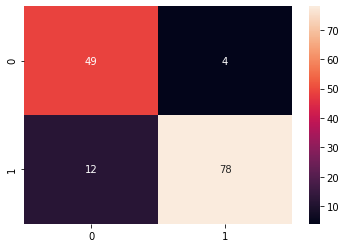

In [15]:

from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [16]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86        53
         1.0       0.95      0.87      0.91        90

    accuracy                           0.89       143
   macro avg       0.88      0.90      0.88       143
weighted avg       0.90      0.89      0.89       143



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


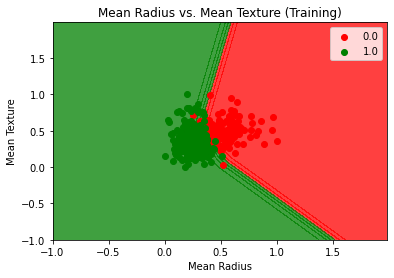

In [17]:

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train_scaled, y_train
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Mean Radius vs. Mean Texture (Training)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()

In [18]:
weights, biases = model.layers[0].get_weights()

In [19]:
weights

array([[ 0.14187466,  0.7157781 , -0.32301366, -0.39749008, -0.6923415 ,
         0.49578506,  0.5241306 ,  0.5565528 ,  0.00384891,  0.06442659,
         0.8975136 , -0.07719076,  0.62814945, -0.43216613,  0.15772676,
         0.39644325, -0.43833697,  0.5765301 ,  0.7781677 , -0.4749123 ],
       [-0.7148072 ,  0.63954186,  0.48723274, -0.08876494,  0.5489941 ,
         0.13909964,  0.25505286,  0.35060373, -0.64307714,  0.19299076,
        -0.13525257, -0.32895267,  0.41440886, -0.43550473,  0.0537504 ,
         0.11300789, -0.4794777 ,  0.03757326,  0.23080532,  0.32113928]],
      dtype=float32)

In [20]:
biases

array([ 0.3220466 ,  0.2513591 , -0.12561326,  0.        ,  0.35012358,
        0.24027807, -0.14025068, -0.16401044,  0.34250543,  0.33626077,
       -0.03395602,  0.        , -0.18583086,  0.        ,  0.33301923,
       -0.08184499,  0.        , -0.07883227, -0.16747057,  0.18897168],
      dtype=float32)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


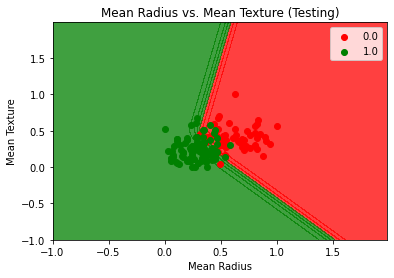

In [21]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_test_scaled, y_test
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Mean Radius vs. Mean Texture (Testing)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()

# Great Job!